In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_bn_weights(checkpoint):
    bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
    bns_weights_all = np.concatenate([checkpoint['model'][layer].cpu().numpy() for layer in bn_layers])
    bns_weights_all[::-1].sort()
    return bns_weights_all

In [4]:
def plot_line_hist(data, bins, color, linewidth):
    n,bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    plt.plot(bin_centers,n,color=color,linewidth=linewidth)
    return bin_edges

In [5]:
def prune(weights, prune_extent):
    return np.sort(weights)[int(len(weights)*prune_extent):]

---
for yolov3-tiny-slimmerer 

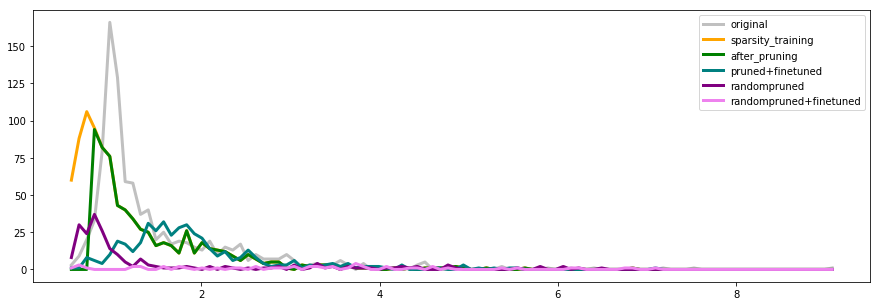

In [6]:
# load original weights before sparsity training
orig = torch.load("weights/slimmerer_first10000_bestconverted.pt")
orig_weights_all = get_bn_weights(orig)

# load sparse weights
checkpoint = torch.load("weights/best_tiny_slimmerer_first_10000_bdd100k_best.pt")
bns_weights_all = get_bn_weights(checkpoint)

# load fine-tined weights
finetuned = torch.load("slimmerer_prune_0.6_0.2/pruned_slimmerer_352_bddfinetuned.pt")
finetuned_bn_weights = get_bn_weights(finetuned)

# load randomedly pruned weights
randompruned = torch.load("slimmerer_prune_0.6_0.2/randompruned_yolov3-tiny_6classes_slimmerer_352_260000.pt")
randompruned_bn_weights = get_bn_weights(randompruned)

# load randomedly pruned + fine-tuned weights
randomfted = torch.load("slimmerer_prune_0.6_0.2/prune_352_fromscratch_best.pt")
randomfted_bn_weights = get_bn_weights(randomfted)

plt.figure(figsize=(15,5))

# plot original weights
# count, bins, ax = plt.hist(orig_weights_all, bins=100,color='black', alpha=0.3)
bins = plot_line_hist(orig_weights_all, 100,'silver',3)

# plot sparse weights
# plt.hist(bns_weights_all, bins=bins, color='gold', alpha=0.6)
plot_line_hist(bns_weights_all,bins,'orange',3)

#plot pruned weights
prune_extent = 0.3
# n,x,_=plt.hist(np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):], bins=bins,color='green',alpha=0.5)
plot_line_hist(np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):],bins,'green',3)

#plot pruned+finetuned weights
plot_line_hist(finetuned_bn_weights,bins,'teal',3)

#plot randompruned weights
plot_line_hist(randomfted_bn_weights,bins,'purple',3)

#plot randompruned + fine-tuned weights
plot_line_hist(randompruned_bn_weights,bins,'violet',3)

plt.legend(['original','sparsity_training','after_pruning',
            'pruned+finetuned', 'randompruned', 'randompruned+finetuned'])

plt.show()

---
26feb: for yolov3-tiny, sparsity = 0.001

In [7]:
np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):].shape

(656,)

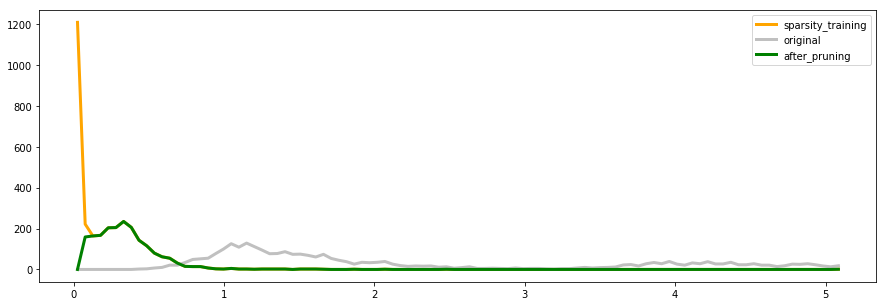

In [8]:
# load original weights before sparsity training
orig = torch.load("weights/orig_tiny_6c_bddTL.pt")
orig_weights_all = get_bn_weights(orig)

# load sparse weights
checkpoint = torch.load("weights/best_yolov3-tiny_6classes_BDDTL_last.pt")
bns_weights_all = get_bn_weights(checkpoint)

plt.figure(figsize=(15,5))

# plot sparse weights
# plt.hist(bns_weights_all, bins=bins, color='gold', alpha=0.6)
bin_edges = plot_line_hist(bns_weights_all,100,'orange',3)

# plot original weights
# count, bins, ax = plt.hist(orig_weights_all, bins=100,color='black', alpha=0.3)
plot_line_hist(orig_weights_all, bin_edges,'silver',3)

#plot pruned weights
prune_extent = 0.4
# n,x,_=plt.hist(np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):], bins=bins,color='green',alpha=0.5)
#plot_line_hist(np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):],bin_edges,'green',3)
plot_line_hist(prune(bns_weights_all, prune_extent),bin_edges,'green',3)
plt.legend(['sparsity_training','original','after_pruning'])

#plt.ylim(0,1200)
plt.show()

---
27feb: for yolov3-tiny, sparsity = **0.0001**

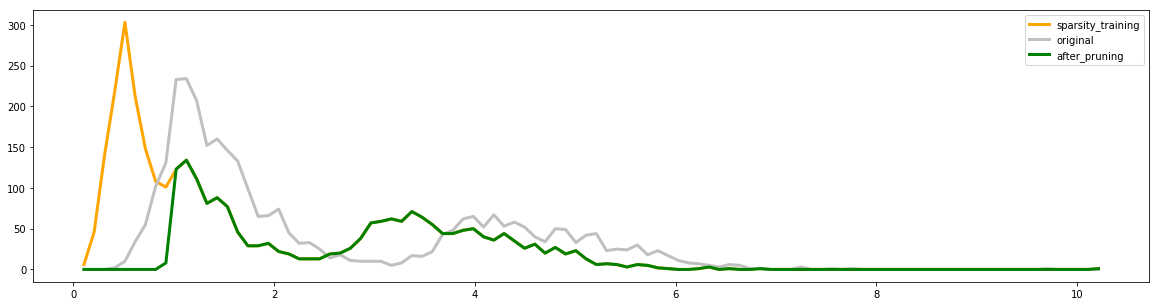

In [10]:
# load original weights before sparsity training
orig = torch.load("weights/orig_tiny_6c_bddTL.pt")
orig_weights_all = get_bn_weights(orig)

# load sparse weights
checkpoint = torch.load("weights/best_yolov3-tiny_6classes_BDDTL_last_sparsity0_0001.pt")
bns_weights_all = get_bn_weights(checkpoint)

# load pruned-finetuned weights
pruned_ft = torch.load("weights/yolov3tiny6c_pruned_finetuned_best.pt")
pruned_ft_weights = get_bn_weights(pruned_ft)

plt.figure(figsize=(20,5)) #(15,5)

# plot sparse weights
# plt.hist(bns_weights_all, bins=bins, color='gold', alpha=0.6)
bin_edges = plot_line_hist(bns_weights_all,100,'orange',3)

# plot original weights
# count, bins, ax = plt.hist(orig_weights_all, bins=100,color='black', alpha=0.3)
plot_line_hist(orig_weights_all, bin_edges,'silver',3)

# plot pruned weights
prune_extent = 0.4
# n,x,_=plt.hist(np.sort(bns_weights_all)[int(len(bns_weights_all)*prune_extent):], bins=bins,color='green',alpha=0.5)
plot_line_hist(prune(bns_weights_all, prune_extent),bin_edges,'green',3)
plt.legend(['sparsity_training','original','after_pruning'])

# plot fine-tuned
#plot_line_hist(pruned_ft_weights, bin_edges,'blue',3)

#plot_line_hist(prune(pruned_ft_weights,0.35), bin_edges,'navy',linewidth=3)

# plot(x, y, 'go--', linewidth=2, markersize=12)
#plt.ylim(0,1200)
plt.show()

---

### To put the model into the correct dict format for conversion

In [1]:
import torch

In [2]:
"""
pt_original: the raw pruned .pt after running prune.py
pt_new: .pt in correct dict format, for conversion to .weights
"""
def output_pruned_model(pt_original, pt_new):
    pruned_model = torch.load(pt_original)
    pruned_pt = {}
    pruned_pt['model'] = pruned_model
    torch.save(pruned_pt, pt_new)

In [3]:
# e.g.
#output_pruned_model("prune_0.6_0.2/prune.pt",'prune_0.6_0.2/prune_model2.pt')
# then run convert script

In [4]:
output_pruned_model("prune_0.5_0.5/prune.pt",'prune_0.5_0.5/prune_beforeFT.pt')

---
Weights by layer

In [13]:
import torch
import numpy as np

In [4]:
def get_bn_weights(checkpoint):
    bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
    bns_weights_all = np.concatenate([checkpoint['model'][layer].cpu().numpy() for layer in bn_layers])
    bns_weights_all[::-1].sort()
    return bns_weights_all

In [98]:
checkpoint = torch.load("weights/slimmerer_first10000_bestconverted.pt")

# BatchNorm2d.weight is gamma, BatchNorm2d.bias is beta
bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
layer_gammas = [checkpoint['model'][layer].cpu().numpy() for layer in bn_layers]

In [136]:
"""plotting the absolute value, not the histogram"""
def plot_layer_gammas(layer_gammas, color='blue'):
    for i,lw in enumerate(layer_gammas):
        ax = fig.add_subplot(2,6,i+1)
        plt.plot(sorted(lw),linewidth=1,c=color)
        plt.title('layer {}'.format(i))

In [127]:
checkpoint = torch.load("weights/orig_tiny_6c_bddTL.pt")
# BatchNorm2d.weight is gamma, BatchNorm2d.bias is beta
bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
layer_gammas_orig = [checkpoint['model'][layer].cpu().numpy() for layer in bn_layers]

In [138]:
checkpoint = torch.load("weights/last_yolov3-tiny_6classes_BDDTL_last.pt")
bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
layer_gammas_001 = [checkpoint['model'][layer].cpu().numpy() for layer in bn_layers]

In [139]:
checkpoint = torch.load("weights/last_yolov3-tiny_6classes_BDDTL_last_sparsity0_0001.pt")
bn_layers = [x for x in checkpoint['model'].keys() if "BatchNorm2d.weight" in x]
layer_gammas_0001 = [checkpoint['model'][layer].cpu().numpy() for layer in bn_layers]

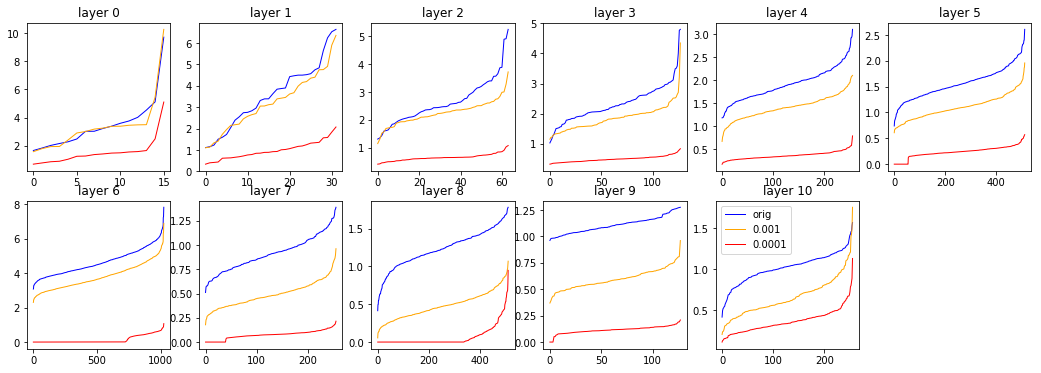

In [143]:
fig = plt.figure(figsize=(18,6)) #(15,5)
plot_layer_gammas(layer_gammas_orig)
plot_layer_gammas(layer_gammas_0001,'orange')
plot_layer_gammas(layer_gammas_001,'red')
plt.legend(['orig','0.001','0.0001'])